<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/MLA1_ZSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning Assignment 1
<br>
Zac Cowan
<br>
CS430
<br>
Machine Learning in the Cloud**

# Mount Google Drive

HW Prompt: <br>
3. *Attached to this Moodle assignment is a file called weather_2012.csv. Download this file and upload it to your Google Drive.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imports and Initializations

HW Prompt:
4. *Read the file into a dataset named “df” from your Google Drive.*

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("drive/MyDrive/MLA/MLA1/weather_2012.csv")

## Viewing the Data

HW Prompts:
5. *Write the code to display the first five rows of the dataset, the last five rows of the dataset and a sample of five random rows from the dataset.*

6. *Write the code to display a list of all of the columns in the dataset.*

In [4]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [6]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
5130,2012-08-01 18:00:00,27.0,18.9,61,15,24.1,100.39,Mainly Clear
8484,2012-12-19 12:00:00,0.8,0.0,94,17,19.3,100.53,Cloudy
839,2012-02-04 23:00:00,-10.1,-14.3,71,0,25.0,101.89,Clear
7257,2012-10-29 09:00:00,11.9,8.5,80,26,24.1,100.61,Cloudy
2499,2012-04-14 03:00:00,5.4,-1.0,63,19,25.0,101.36,Mainly Clear


In [7]:
# PRint the columns in the data frame
print(df.columns)

Index(['Date/Time', 'Temp (C)', 'Dew Point Temp (C)', 'Rel Hum (%)',
       'Wind Spd (km/h)', 'Visibility (km)', 'Stn Press (kPa)', 'Weather'],
      dtype='object')


## Modifying the DataFrame

HW Prompt:
7. *The column names are unwieldy for our purposes. Rename them according to this list (date_time, temp_c, dew_point, relative_humidity, wind_speed, visibility, pressure, and weather).*

In [8]:
df=df.rename(columns={"Date/Time": "date_time",
                   "Temp (C)": "temp_c",
                   "Dew Point Temp (C)": "dew_point",
                   "Rel Hum (%)": "relative_humidity",
                   "Wind Spd (km/h)": "wind_speed",
                   "Visibility (km)": "visibility",
                   "Stn Press (kPa)": "pressure",
                   "Weather": "weather"})


## Numberical Analysis + Manipulation

HW Prompts:
8. *Most of the data in the dataset are numerical, write the code to get some standard statistics for each column (e.g. count, mean, etc.)*
9. *Write the code to add a column named temp_f to the dataset that contains the temperature from temp_c represented in Fahrenheit.*
10. *Write the code to rearrange the columns in the dataset so temp_f appears immediately before temp_c.*


In [9]:
df_num=df.select_dtypes("number")

In [10]:
df_num.mean()

,0
temp_c,8.798144
dew_point,2.555294
relative_humidity,67.431694
wind_speed,14.945469
visibility,27.664447
pressure,101.051623


In [11]:
df_num.count()

,0
temp_c,8784
dew_point,8784
relative_humidity,8784
wind_speed,8784
visibility,8784
pressure,8784


In [12]:
df['temp_f'] = (df["temp_c"] * 9 / 5) + 32

In [13]:
col = df.pop("temp_f")
df.insert(1, "temp_f", col)

## String to DateTime Conversion + Grouping Data by Month

HW Prompts:
11. *Write the code to display the data types of all the columns in the dataset.*
12. *The date_time column is not actually considered a date by Pandas.  Write the code to convert this column to a date/time column and to verify the conversion was successful.*
13. *Write the code to get the average temperature (in F) for each month and write it into an object called monthly_avg. This object should be a Pandas Series which is similar to a Pandas Dataframe except it only has one column.  You will plot this data later.*



In [14]:
df.dtypes

,0
date_time,object
temp_f,float64
temp_c,float64
dew_point,float64
relative_humidity,int64
wind_speed,int64
visibility,float64
pressure,float64
weather,object


In [15]:
df["date_time"] = pd.to_datetime(df["date_time"])

In [16]:
monthly_avg=pd.Series(df.groupby(pd.PeriodIndex(df['date_time'], freq="m"))['temp_f'].mean().tolist())
monthly_avg

,0
0,18.731290
1,24.395000
2,37.618226
3,44.616750
4,61.227984
5,68.241250
6,73.022097
7,72.102742
8,61.672000
9,51.718952


## Data Visualization + Plots

HW Prompts:
14. *Write code to generate a scatterplot that compares the temperature against the relative humidity.  The size of your plot should be 20 x 10 and should look like the plot below:* 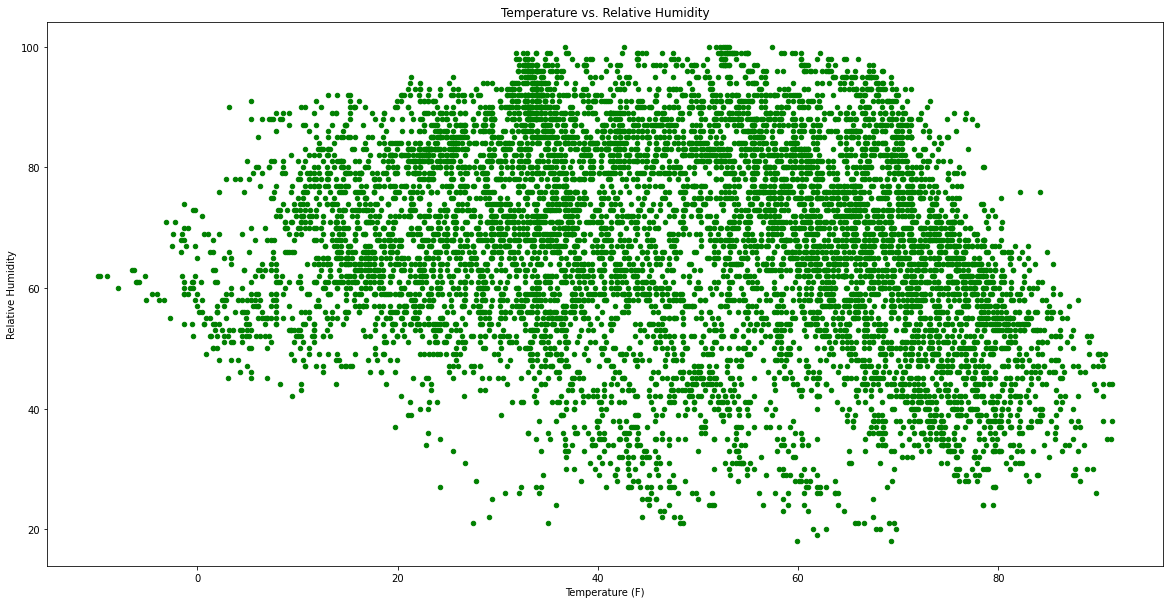

15. *Write the code to generate a line chart that shows the average temperature per month. The size of your plot should 20 x 10 and should look like the plot below:*
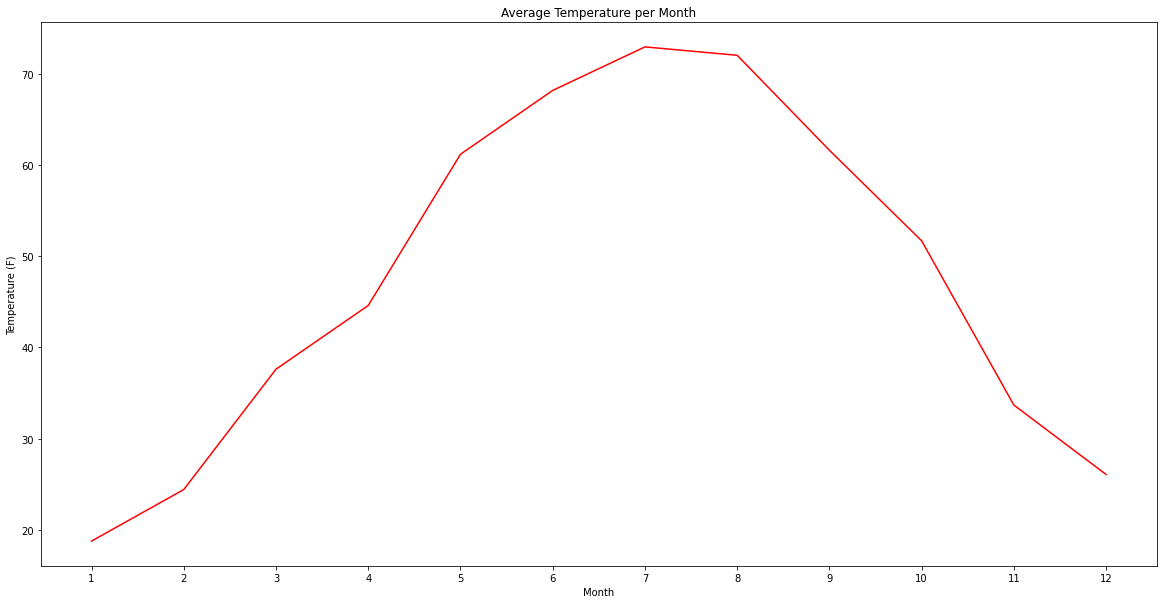

16. *Write the code to generate a box plot. The size of your plot should 20 x 10 and should look like the plot below:*
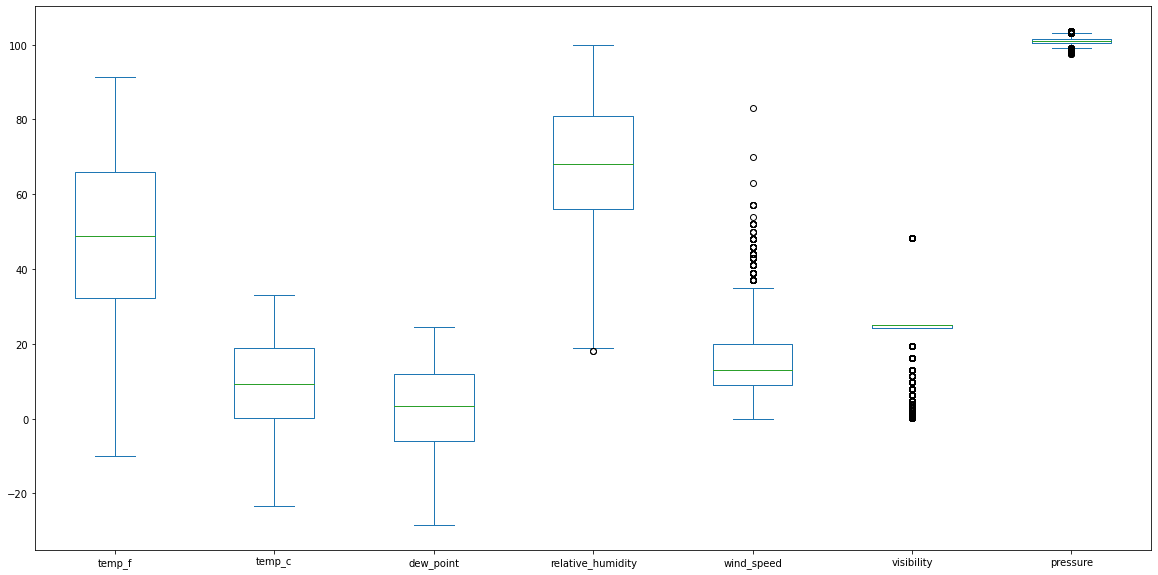

Text(0.5, 0, 'Temperature (F)')

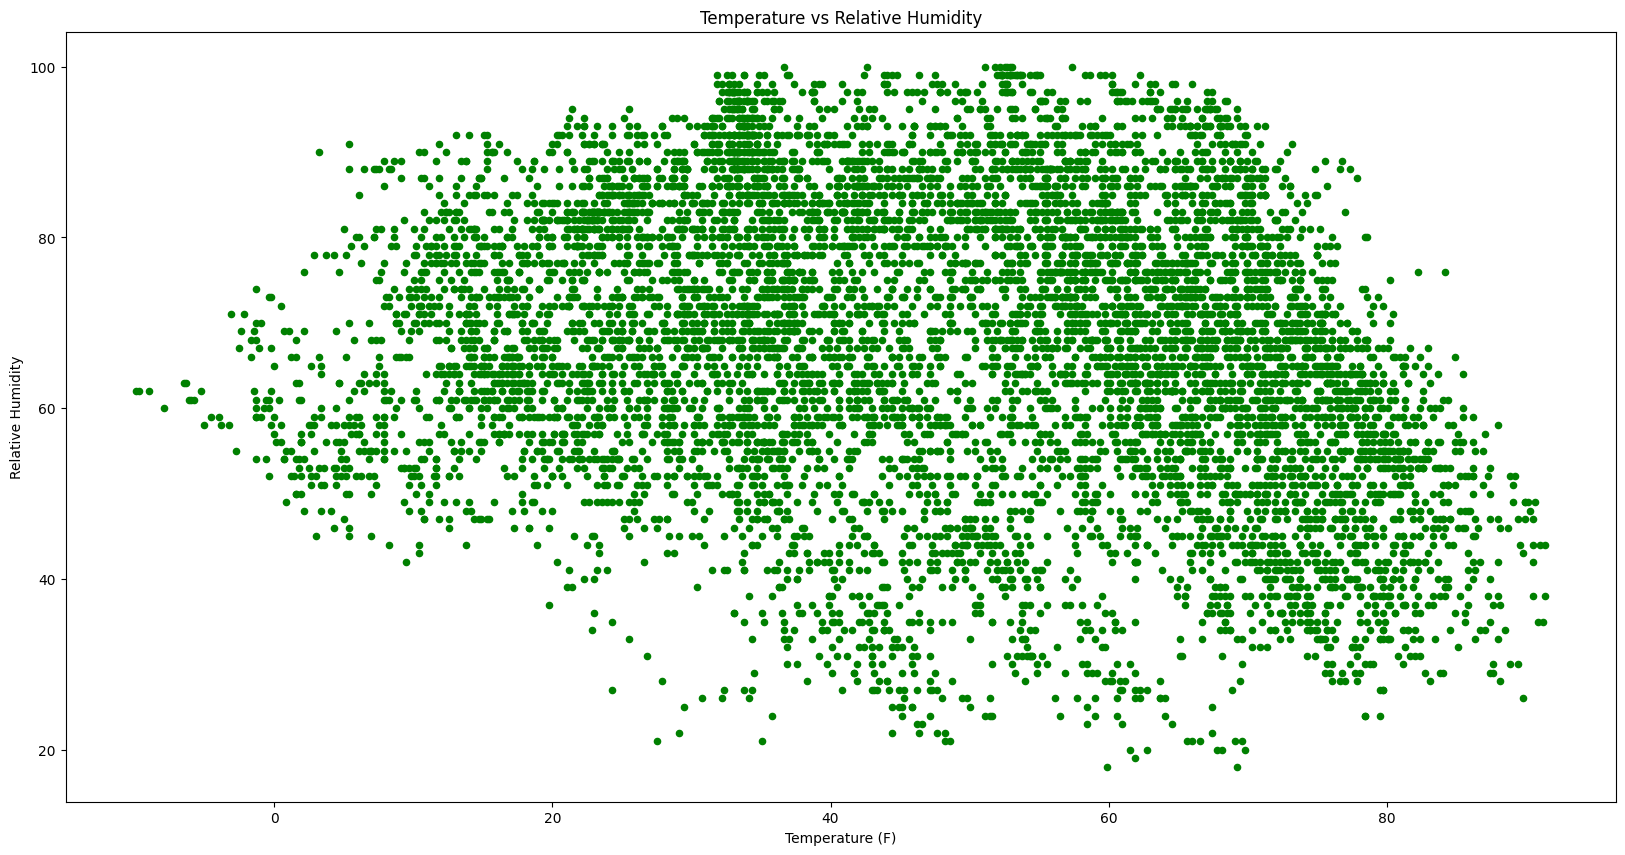

In [17]:
scatter_plot=df.plot.scatter("temp_f", "relative_humidity", c="green", title="Temperature vs Relative Humidity", figsize=(20,10))
scatter_plot.set_ylabel("Relative Humidity")
scatter_plot.set_xlabel("Temperature (F)")

Text(0, 0.5, 'Temperature (F)')

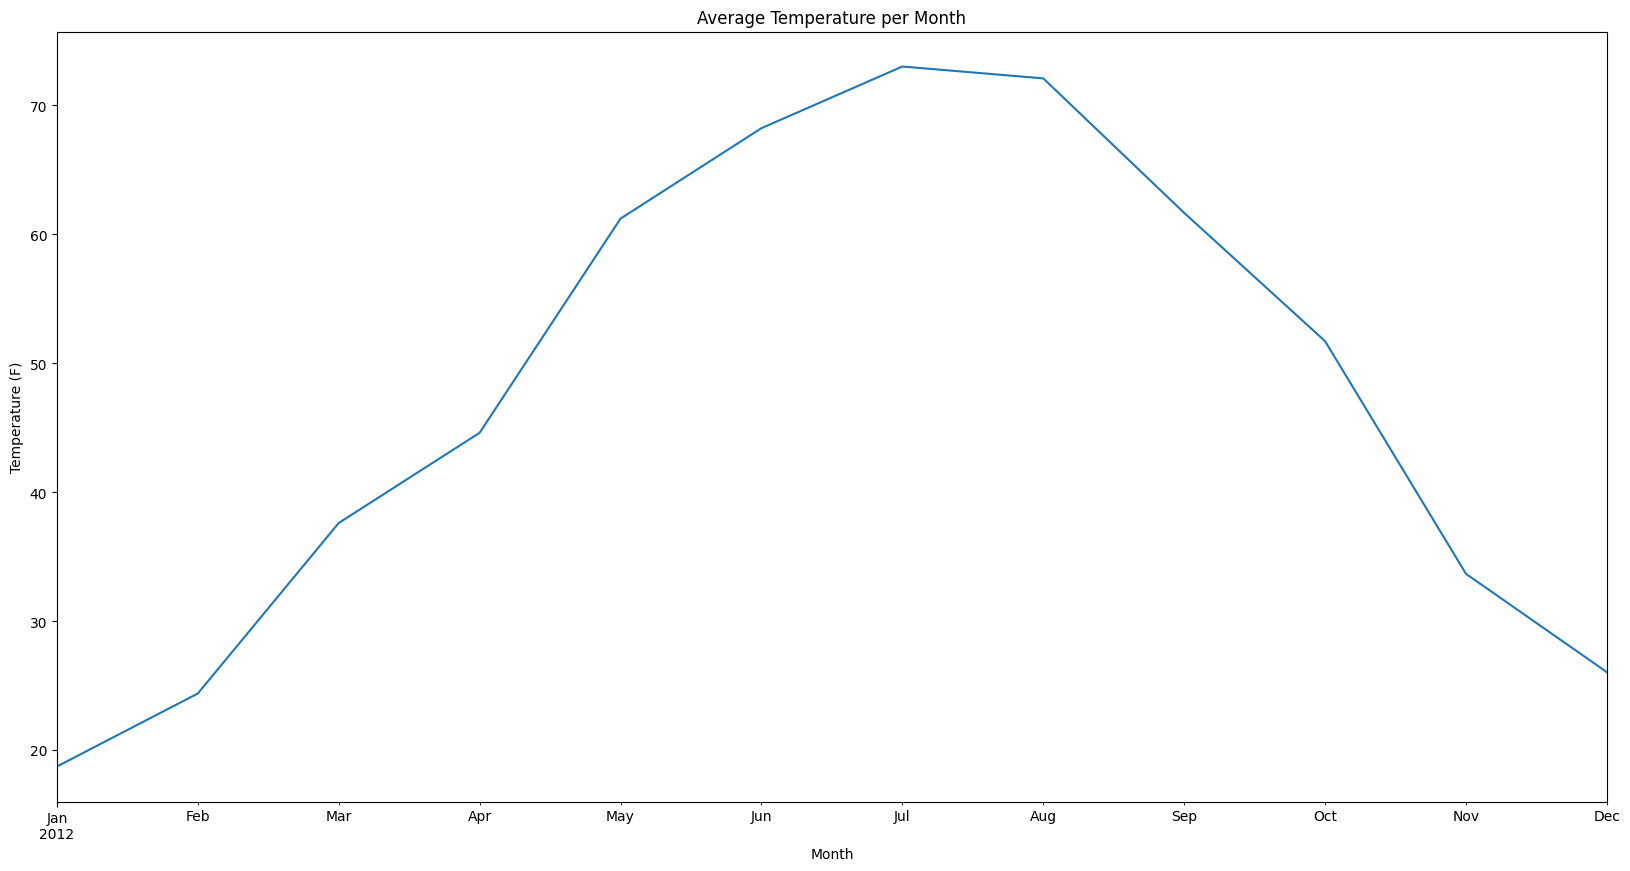

In [18]:
line_plot=df.groupby(pd.PeriodIndex(df['date_time'], freq="m"))["temp_f"].mean().plot.line("date_time", "temp_f", title="Average Temperature per Month",figsize=(20,10))
line_plot.set_xlabel("Month")
line_plot.set_ylabel("Temperature (F)")

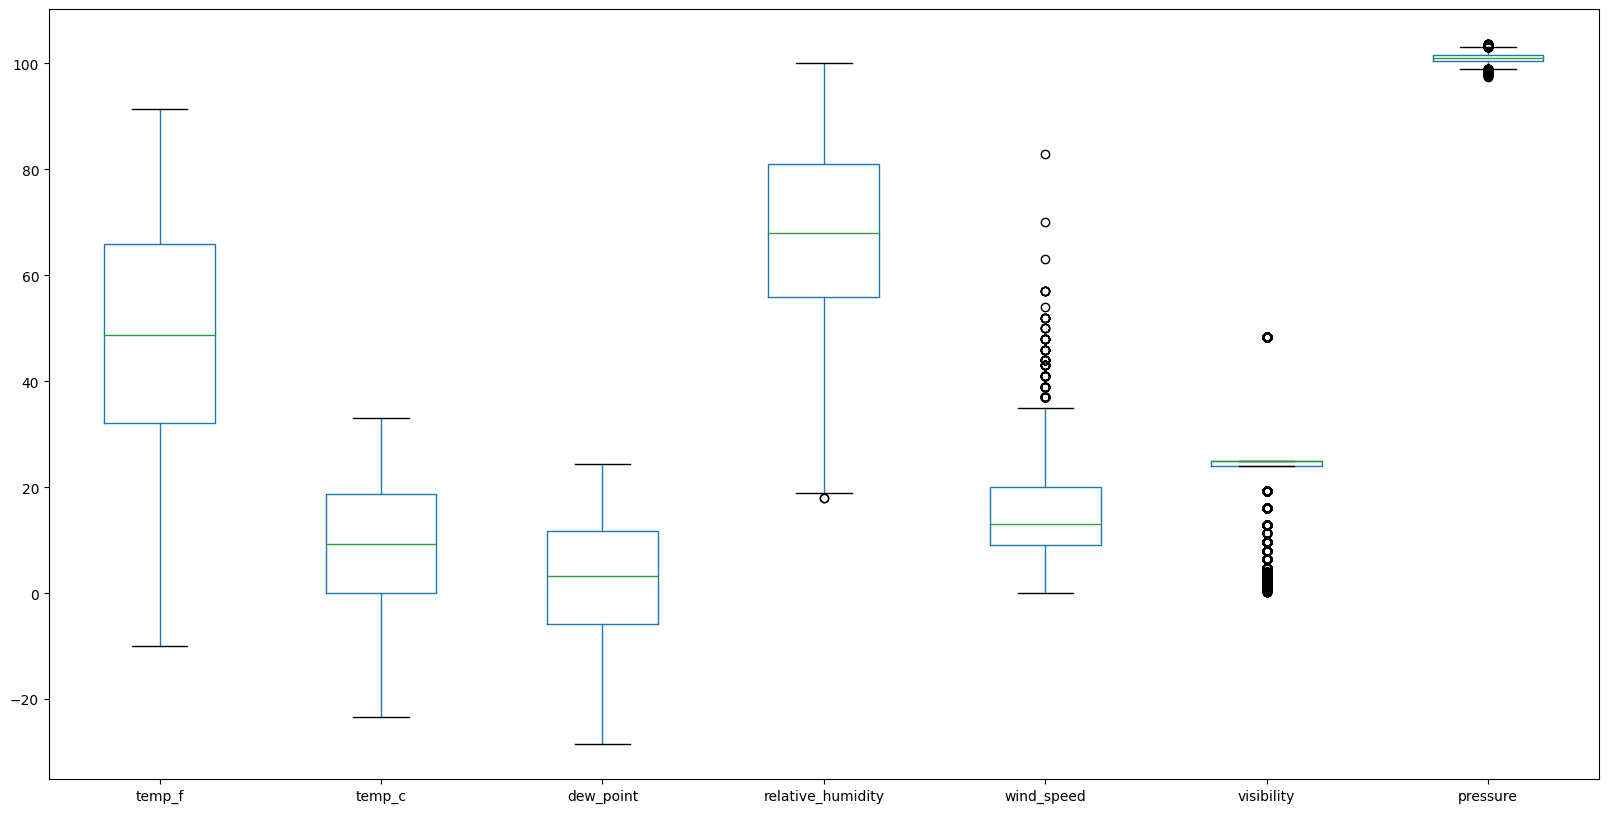

In [19]:
box_plot=df.boxplot(figsize=(20,10), grid=False)
